In [74]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

In [75]:
# Load the dataset
database = "C:\\Users\\h473401\\Global Power Plant Database1.csv"
data = pd.read_csv(database)

In [76]:
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [78]:
# Drop rows with missing values in the columns we are interested in
data = data.dropna(subset=['primary_fuel', 'capacity_mw'])

In [79]:
# Convert commissioning_year and year_of_capacity_data to integers and fill missing values with zeros
data['commissioning_year'] = data['commissioning_year'].fillna(0).astype(int)
data['year_of_capacity_data'] = data['year_of_capacity_data'].fillna(0).astype(int)

In [80]:
# Convert latitude and longitude to numeric and fill missing values with zeros
data['latitude'] = data['latitude'].fillna(0)
data['longitude'] = data['longitude'].fillna(0)

In [83]:
# Convert other_fuel columns to binary indicators (1 if present, 0 if missing)
data['other_fuel1'] = data['other_fuel1'].notna().astype(int)
data['other_fuel2'] = data['other_fuel2'].notna().astype(int)

In [84]:
# Drop columns with a large number of missing values
data.drop(['other_fuel3', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019', 'estimated_generation_gwh', 'url'], axis=1, inplace=True)

In [85]:
# For numerical columns, you can fill with mean, median, or zeros as needed
numerical_cols = data.select_dtypes(include=['float64']).columns
data[numerical_cols] = data[numerical_cols].fillna(0)  # Fill with zeros as an example, you can use other strategies

In [86]:
# For categorical columns, you can fill with the most frequent category or use another appropriate strategy
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])  # Fill with the most frequent category

In [87]:
# Split the dataset into features (X) and target labels (y)
X = data.drop(['primary_fuel', 'capacity_mw', 'name', 'gppd_idnr'], axis=1)  # Features
y_fuel = data['primary_fuel']  # Target for primary fuel

In [88]:
# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['country', 'country_long', 'geolocation_source', 'owner', 'source', 'generation_data_source'])

In [89]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_fuel_train, y_fuel_test = train_test_split(
    X, y_fuel, test_size=0.2, random_state=42
)

In [90]:
# Train a Random Forest Classifier for predicting primary fuel
fuel_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
fuel_classifier.fit(X_train, y_fuel_train)

RandomForestClassifier(random_state=42)

In [91]:
# Make predictions on the test set
fuel_predictions = fuel_classifier.predict(X_test)


In [92]:
# Evaluate the model
fuel_accuracy = accuracy_score(y_fuel_test, fuel_predictions)

In [93]:
print("Primary Fuel Prediction Accuracy:", fuel_accuracy)

Primary Fuel Prediction Accuracy: 0.8296703296703297


C:\Users\h473401\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\h473401\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\h473401\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


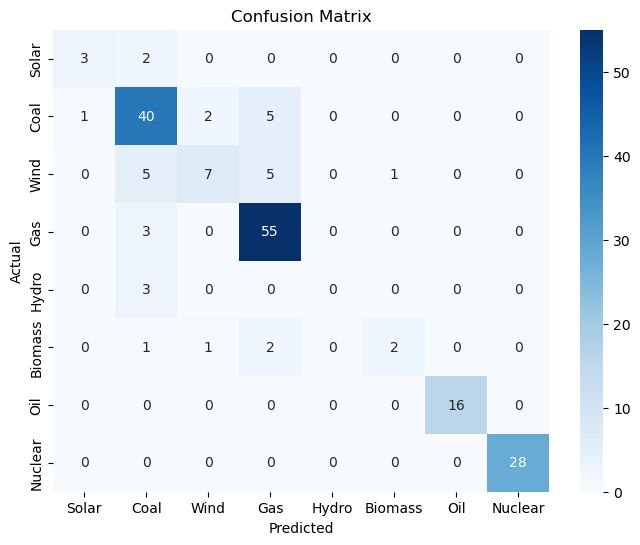

Classification Report:
               precision    recall  f1-score   support

       Solar       0.75      0.60      0.67         5
        Coal       0.74      0.83      0.78        48
        Wind       0.70      0.39      0.50        18
         Gas       0.82      0.95      0.88        58
       Hydro       0.00      0.00      0.00         3
     Biomass       0.67      0.33      0.44         6
         Oil       1.00      1.00      1.00        16
     Nuclear       1.00      1.00      1.00        28

    accuracy                           0.83       182
   macro avg       0.71      0.64      0.66       182
weighted avg       0.81      0.83      0.81       182



In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test set
fuel_predictions = fuel_classifier.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_fuel_test, fuel_predictions)

# Create a classification report
report = classification_report(y_fuel_test, fuel_predictions, target_names=y_fuel.unique())

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=y_fuel.unique(), yticklabels=y_fuel.unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print("Classification Report:\n", report)
